<h1><center> Symptoms based Hospital Department Prediction (PCC)</center></h1>

In [1]:
### import packages

## lets basic import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score

# from pandas_profiling import ProfileReport

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [2]:
## import data

df = pd.read_csv('DiseaseDept2.csv')
df = shuffle(df, random_state = 42)
df.head()

,Department,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Dermatology Department,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Dermatology Department,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Endocrinology Department,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,Infectious Disease or HIV/AIDS Clinic,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Gastroenterology or Hepatology Department,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
symp_cols = df[df.columns[1:]].columns

In [4]:
%%time
values = []
for col in symp_cols :
    values = values + list(df[symp_cols[0]].values)

CPU times: total: 0 ns
Wall time: 3 ms


In [5]:
from collections import Counter

In [6]:
counter = Counter(values)

In [7]:
results = pd.Series(dict(counter))

<AxesSubplot:>

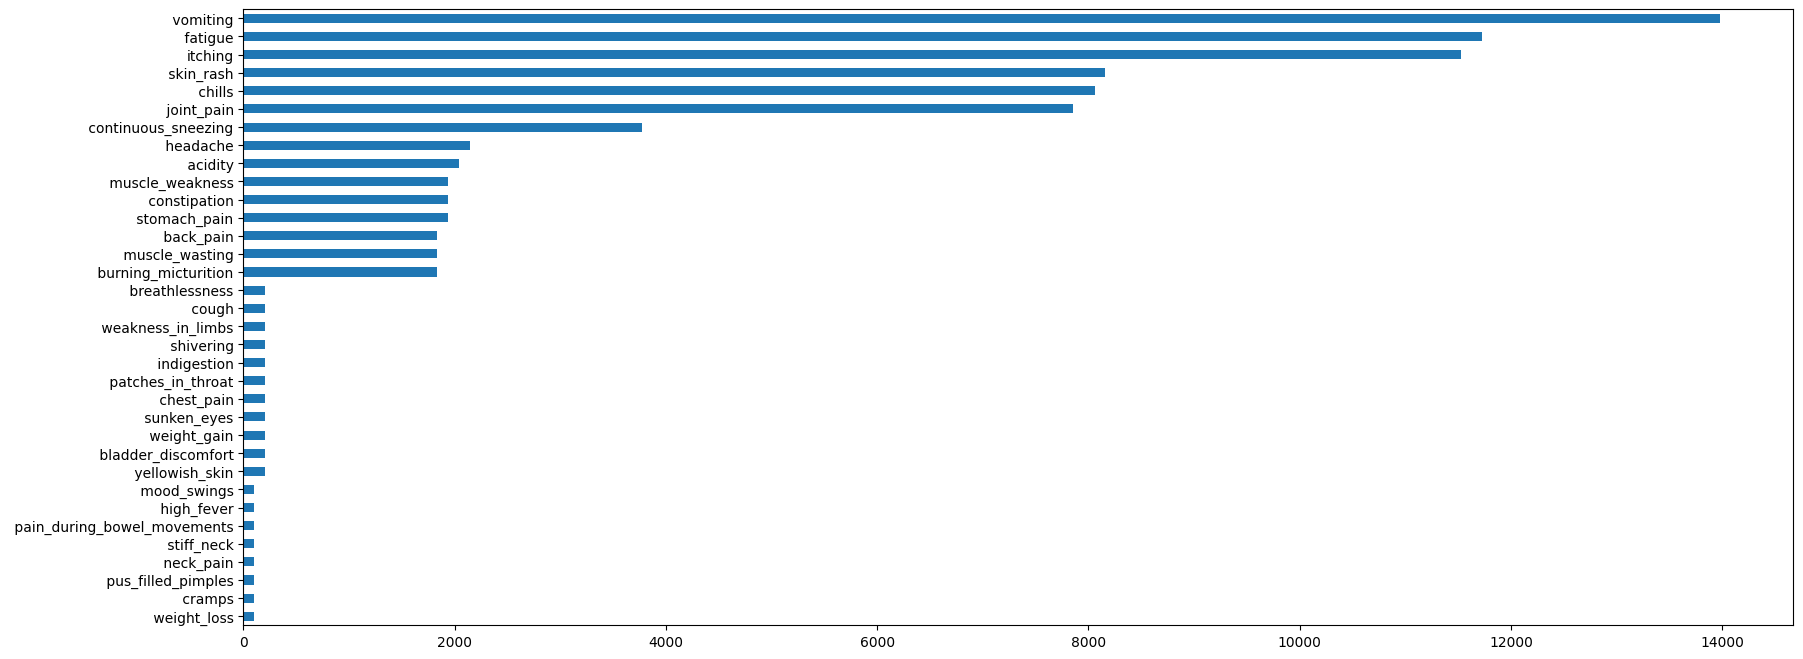

In [8]:
results.sort_values(ascending=True).plot(kind='barh',figsize=(20,8))

In [9]:
## remove ('_') underscore in the text

for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
    
df.head()

,Department,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Dermatology Department,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Dermatology Department,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Endocrinology Department,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,Infectious Disease or HIV/AIDS Clinic,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Gastroenterology or Hepatology Department,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
## charactieristics of data

df.describe()

,Department,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,31,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Gastroenterology or Hepatology Department,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,960,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [11]:
## check null values

null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Department      0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


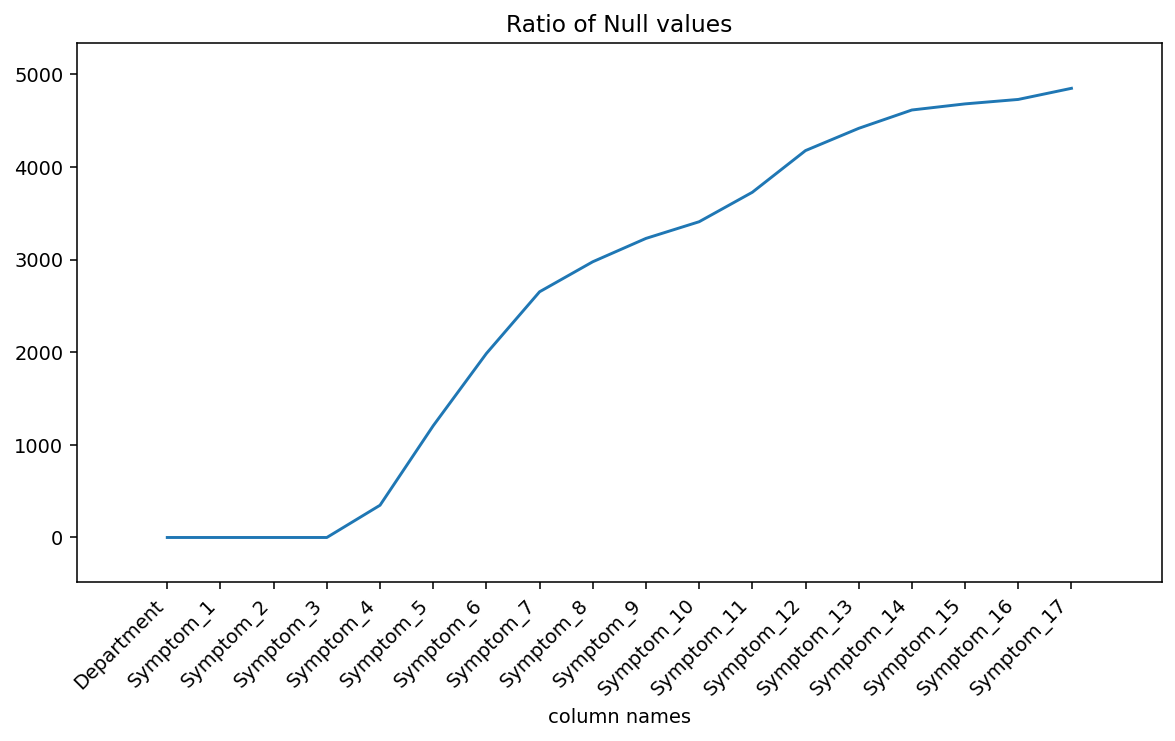

In [12]:
## plot of null value

plt.figure(figsize=(10, 5), dpi=140)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [13]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Department,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Dermatology Department,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dermatology Department,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Endocrinology Department,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,Infectious Disease or HIV/AIDS Clinic,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gastroenterology or Hepatology Department,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## lets fill nan values

df = df.fillna(0)
df.head()

,Department,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Dermatology Department,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Dermatology Department,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Endocrinology Department,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,Infectious Disease or HIV/AIDS Clinic,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Gastroenterology or Hepatology Department,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'name of departments')

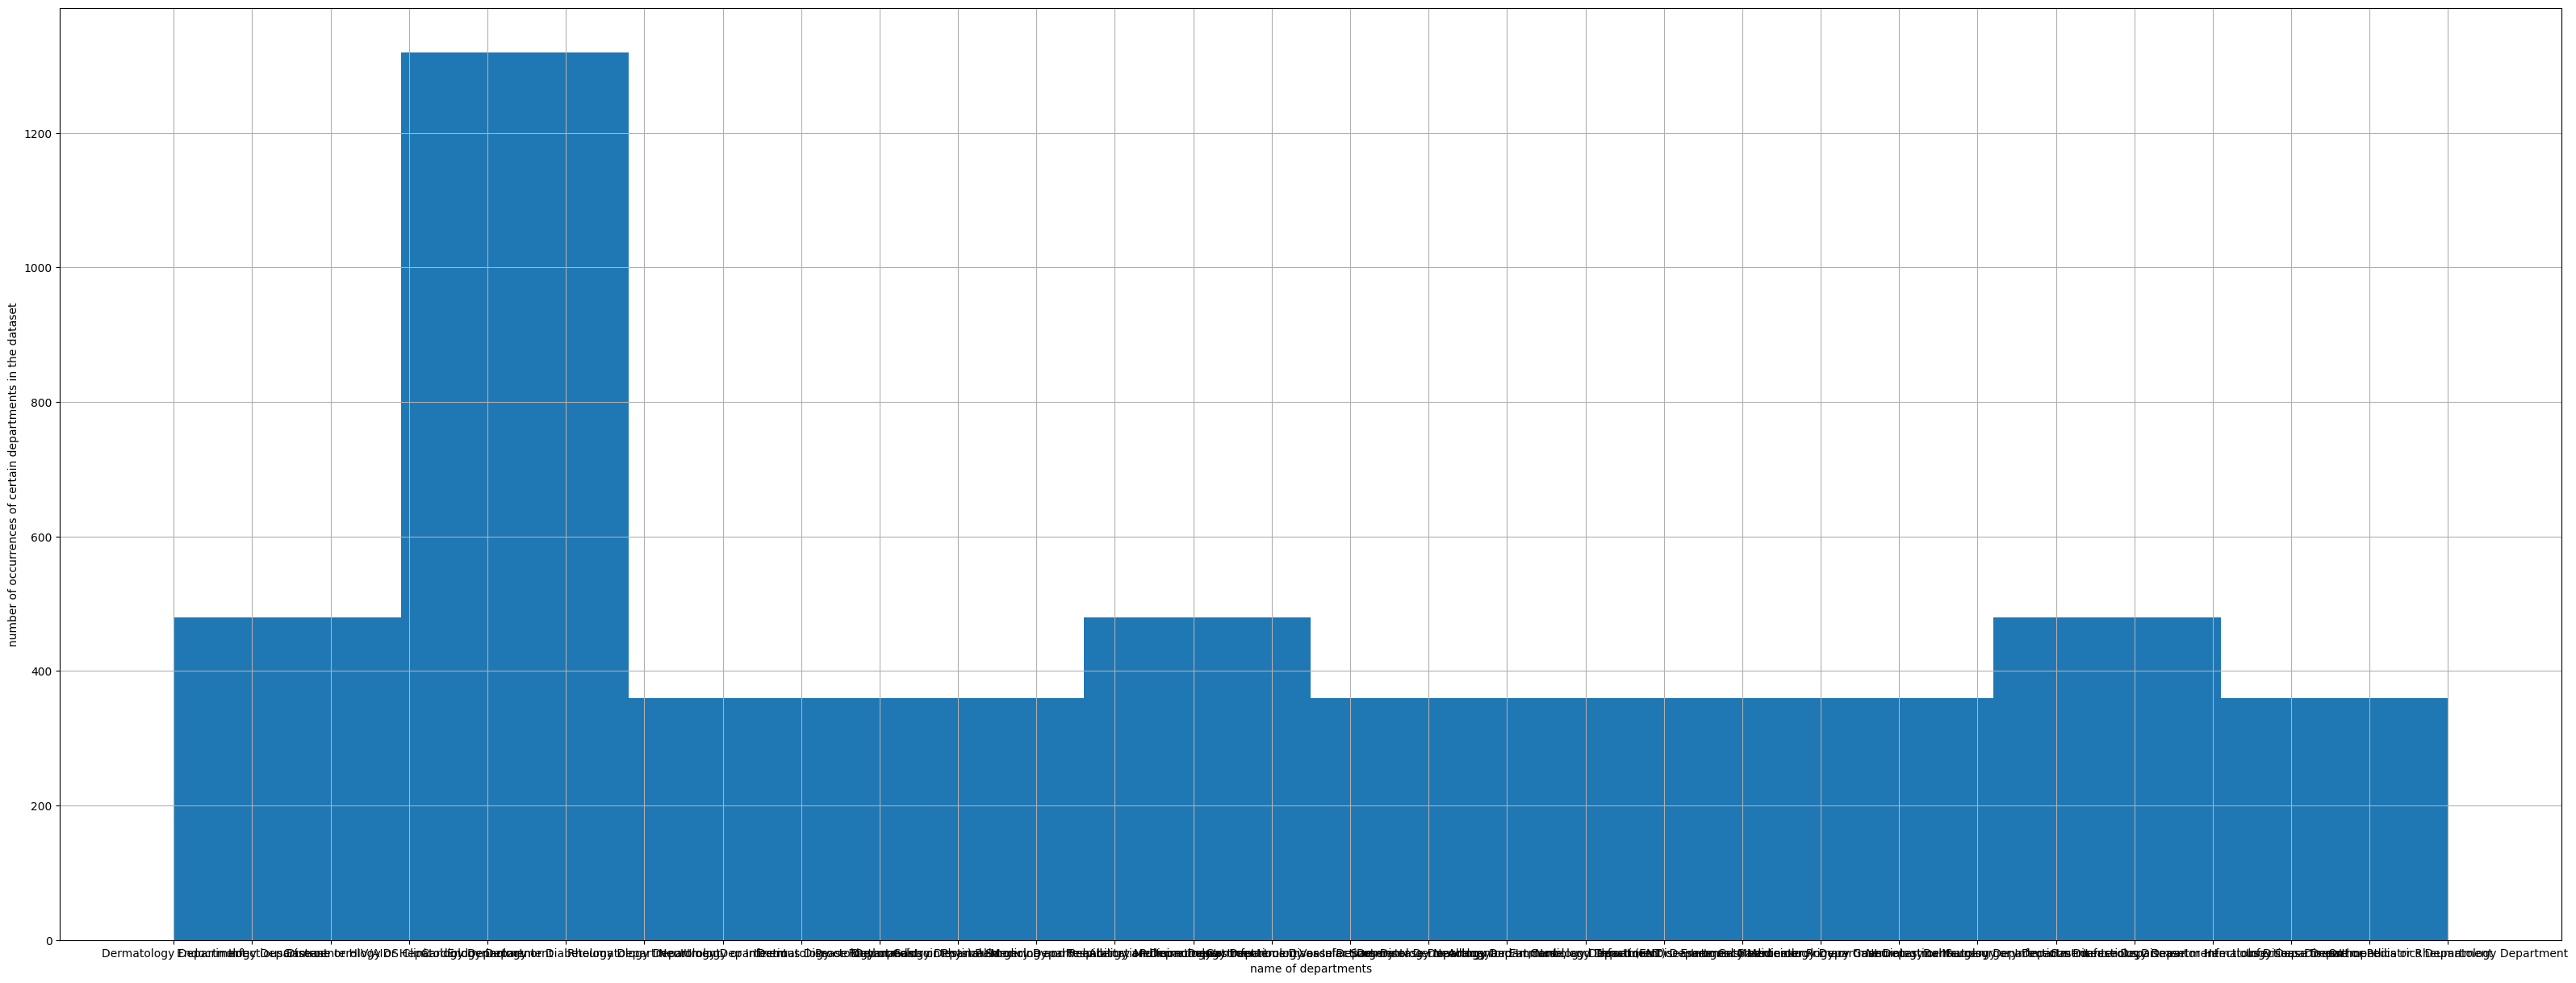

In [15]:
# this plot is to check if target is balance

fig = plt.figure(figsize=(40, 15))
ax = fig.gca()
df["Department"].hist(ax =ax)
plt.ylabel("number of occurrences of certain departments in the dataset")
plt.xlabel("name of departments")

In [16]:
df['Symptom_1'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_2'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_3'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_4'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_5'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_6'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_7'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_8'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_9'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_10'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_11'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_12'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_13'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_14'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_15'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_16'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df['Symptom_17'].replace(['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'excessive hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell ofurine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'prognosis'],[1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2, 6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4, 6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4, 3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3, 3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 5], inplace=True)
df.head()

,Department,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Dermatology Department,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Dermatology Department,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Endocrinology Department,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,Infectious Disease or HIV/AIDS Clinic,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Gastroenterology or Hepatology Department,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


In [17]:
## assign symptoms with no rank to zero

df['Symptom_1'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_2'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_3'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_4'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_5'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_6'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_7'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_8'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_9'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_10'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_11'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_12'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_13'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_14'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_15'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_16'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)
df['Symptom_17'].replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], [0,0,0], inplace=True)

In [18]:
## lets explore symptom severity

df_severity = pd.read_csv('Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head(10)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

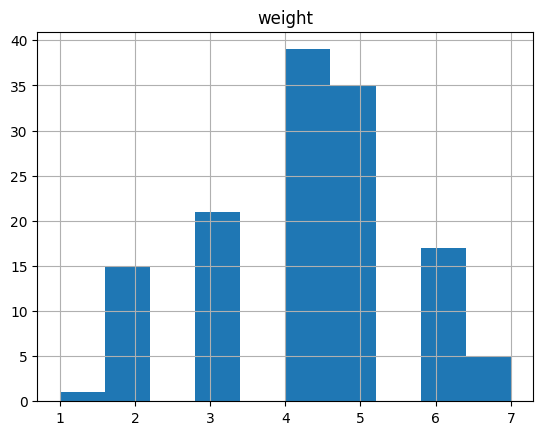

In [19]:
df_severity.hist()

In [20]:
df_severity["weight"].unique()

array([1, 3, 4, 5, 6, 2, 7], dtype=int64)

In [21]:
symptoms = list(df_severity['Symptom'].unique())
departments = list(df['Department'].unique())

In [22]:
print('there are {} symptoms described in the dataset'.format(len(symptoms)))
print('there are {} departments described in the dataset'.format(len(departments)))

there are 132 symptoms described in the dataset
there are 30 departments described in the dataset


In [23]:
## overall list

df_severity['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

<h1><center>The END</center></h1>